In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def quartile(dataset, type):
    if type == 1:
        temp = (len(dataset)+1)/4
        pos = round(temp)
        if temp.is_integer():
            return dataset[int(temp)]
        else:
            if pos<temp:
                return ((3*dataset[pos-1])+(dataset[pos]))/4
            elif pos>temp:
                return ((dataset[pos-1])+(3*dataset[pos]))/4
            else:
                return ((dataset[pos-1])+(dataset[pos]))/2
    elif type == 3:
        temp = (3*(len(dataset)+1))/4
        pos = round(temp)
        if temp.is_integer():
            return dataset[int(temp)]
        else:
            if pos<temp:
                return ((3*dataset[pos-2])+(dataset[pos-1]))/4
            elif pos>temp:
                return ((dataset[pos-2])+(3*dataset[pos-1]))/4
            else:
                return ((dataset[pos-2])+(dataset[pos-1]))/2
    


In [3]:
def outliers(dataset):
    dataset = sorted(dataset)
    # q1, q3 = np.percentile(dataset, [25, 75])
    q1 = quartile(dataset=dataset, type=1)
    q3 = quartile(dataset=dataset, type=3)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr) 
    return lower_bound, upper_bound

In [4]:
def average(dataset):
    avg = np.mean(dataset)
    return avg

In [5]:
def clean_data(dataset, lower_boundary, upper_boundary, column):
    for index, row in dataset.iterrows():
        if row[column] < lower_boundary:
            dataset = dataset.drop(labels=[index], axis=0)
        elif row[column] > upper_boundary:
            dataset = dataset.drop(labels=[index], axis=0)
    return dataset

In [6]:
rock = pd.read_csv('tracking-rock.csv')
paper = pd.read_csv('tracking-paper.csv')
scissors = pd.read_csv('tracking-scissors.csv')

# Rock Tracking Analysis

In [7]:
display(rock)

,OA,OB,OC,OD,OE
0,139.517024,112.871608,109.622078,108.166538,107.224064
1,150.096636,129.711218,117.153745,106.526992,96.747093
2,156.118545,129.294238,117.443603,107.056060,94.667840
3,135.959553,129.711218,117.004273,106.216760,94.031909
4,142.667445,129.711218,116.211015,106.301458,95.131488
...,...,...,...,...,...
1022,162.505385,142.863571,125.251746,112.329871,104.062481
1023,156.977705,133.764719,118.152444,109.480592,101.636608
1024,181.705806,136.003676,116.691902,109.931797,98.979796
1025,188.732615,116.970082,96.384646,82.975900,77.369245


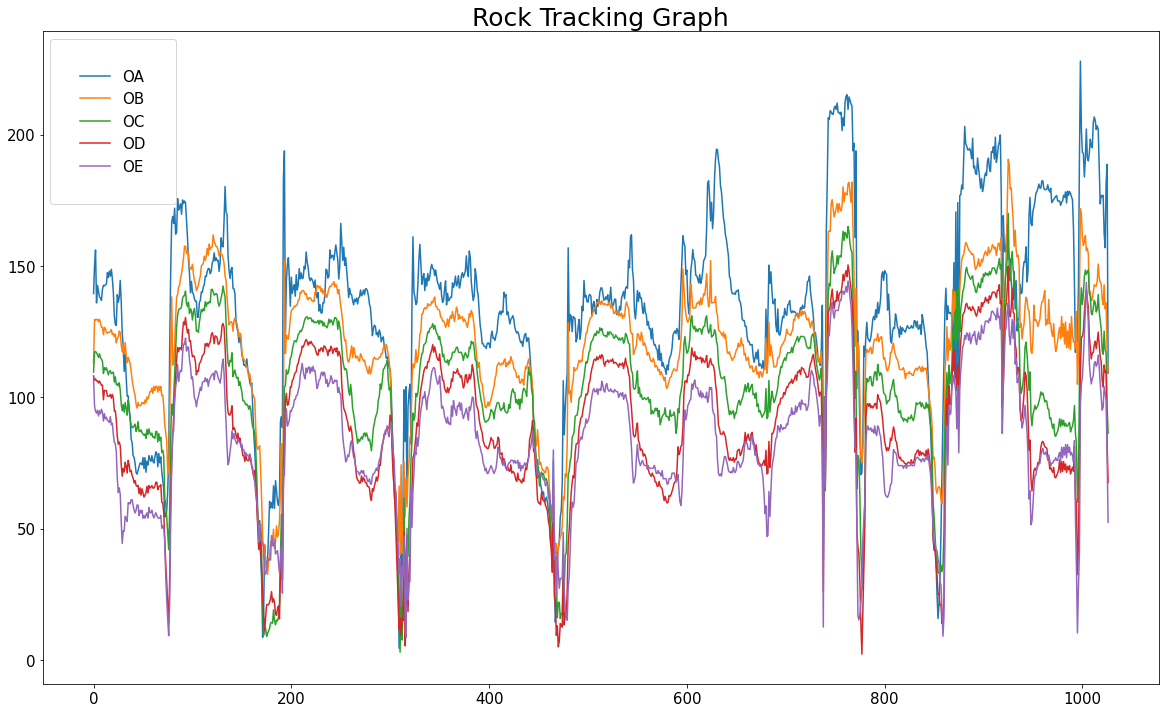

In [8]:
plt.plot(rock)
# plt.gca().get_lines().set_color(['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:purple'])
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Rock Tracking Graph", fontsize=25)
plt.legend(rock.columns, loc='upper left', prop={'size': 15}, borderpad=2)
plt.show()

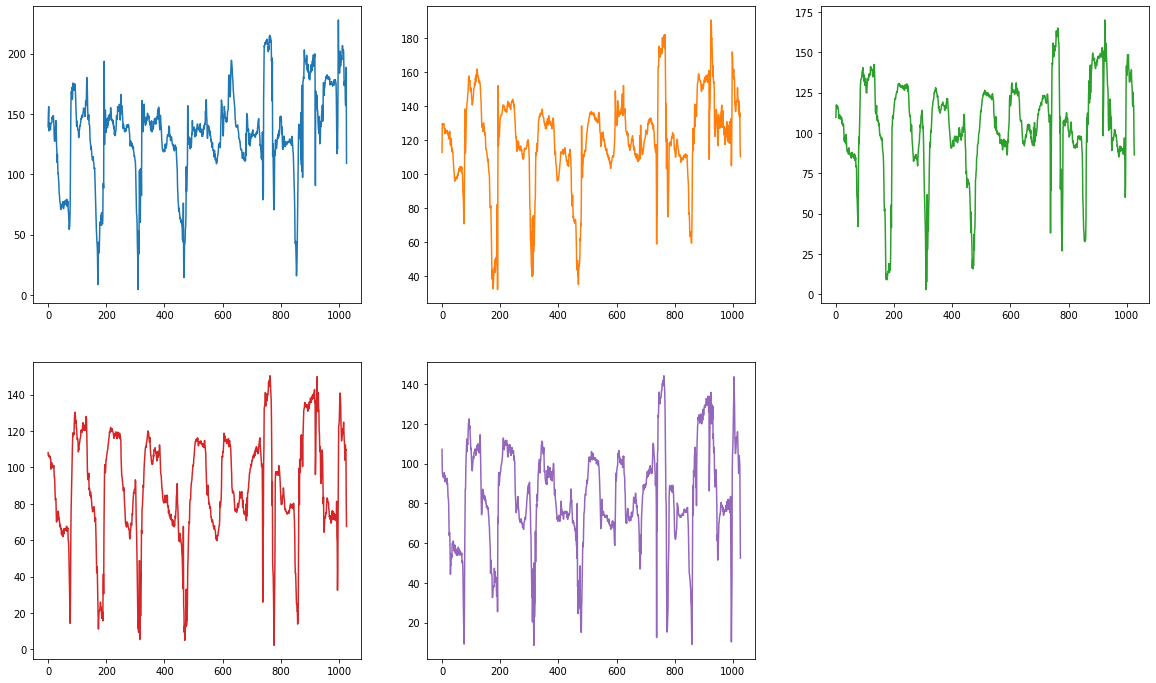

In [9]:
ax1 = plt.subplot(231)
ax1 = plt.plot(rock.OA, color='tab:blue')
ax2 = plt.subplot(232)
ax2 = plt.plot(rock.OB, color='tab:orange')
ax3 = plt.subplot(233)
ax3 = plt.plot(rock.OC, color='tab:green')
ax4 = plt.subplot(234)
ax4 = plt.plot(rock.OD, color='tab:red')
ax5 = plt.subplot(235)
ax5 = plt.plot(rock.OE, color='tab:purple')
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.show()

In [10]:
ax1_outliers_low, ax1_outliers_up = outliers(rock.OA)
ax1_avg = average(rock.OA)
ax1_lim_up = (ax1_outliers_up + ax1_avg) / 2
ax1_lim_low = (ax1_outliers_low + ax1_avg) / 2
ax2_outliers_low, ax2_outliers_up = outliers(rock.OB)
ax2_avg = average(rock.OB)
ax2_lim_up = (ax2_outliers_up + ax2_avg) / 2
ax2_lim_low = (ax2_outliers_low + ax2_avg) / 2
ax3_outliers_low, ax3_outliers_up = outliers(rock.OC)
ax3_avg = average(rock.OC)
ax3_lim_up = (ax3_outliers_up + ax3_avg) / 2
ax3_lim_low = (ax3_outliers_low + ax3_avg) / 2
ax4_outliers_low, ax4_outliers_up = outliers(rock.OD)
ax4_avg = average(rock.OD)
ax4_lim_up = (ax4_outliers_up + ax4_avg) / 2
ax4_lim_low = (ax4_outliers_low + ax4_avg) / 2
ax5_outliers_low, ax5_outliers_up = outliers(rock.OE)
ax5_avg = average(rock.OE)
ax5_lim_up = (ax5_outliers_up + ax5_avg) / 2
ax5_lim_low = (ax5_outliers_low + ax5_avg) / 2

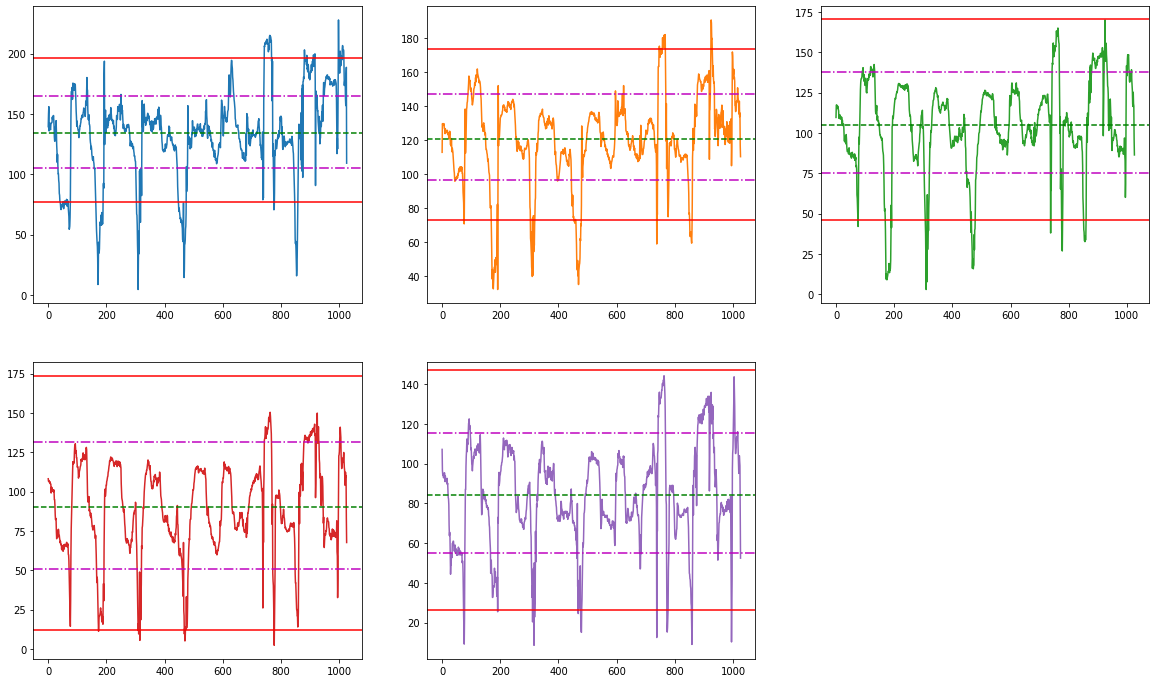

In [11]:
ax1 = plt.subplot(231)
ax1 = plt.plot(rock.OA, color='tab:blue')
ax1 = plt.axhline(y=ax1_outliers_low, color='r', linestyle='-')
ax1 = plt.axhline(y=ax1_outliers_up, color='r', linestyle='-')
ax1 = plt.axhline(y=ax1_avg, color='g', linestyle='--')
ax1 = plt.axhline(y=ax1_lim_up, color='m', linestyle='-.')
ax1 = plt.axhline(y=ax1_lim_low, color='m', linestyle='-.')
ax2 = plt.subplot(232)
ax2 = plt.plot(rock.OB, color='tab:orange')
ax2 = plt.axhline(y=ax2_outliers_low, color='r', linestyle='-')
ax2 = plt.axhline(y=ax2_outliers_up, color='r', linestyle='-')
ax2 = plt.axhline(y=ax2_avg, color='g', linestyle='--')
ax2 = plt.axhline(y=ax2_lim_up, color='m', linestyle='-.')
ax2 = plt.axhline(y=ax2_lim_low, color='m', linestyle='-.')
ax3 = plt.subplot(233)
ax3 = plt.plot(rock.OC, color='tab:green')
ax3 = plt.axhline(y=ax3_outliers_low, color='r', linestyle='-')
ax3 = plt.axhline(y=ax3_outliers_up, color='r', linestyle='-')
ax3 = plt.axhline(y=ax3_avg, color='g', linestyle='--')
ax3 = plt.axhline(y=ax3_lim_up, color='m', linestyle='-.')
ax3 = plt.axhline(y=ax3_lim_low, color='m', linestyle='-.')
ax4 = plt.subplot(234)
ax4 = plt.plot(rock.OD, color='tab:red')
ax4 = plt.axhline(y=ax4_outliers_low, color='r', linestyle='-')
ax4 = plt.axhline(y=ax4_outliers_up, color='r', linestyle='-')
ax4 = plt.axhline(y=ax4_avg, color='g', linestyle='--')
ax4 = plt.axhline(y=ax4_lim_up, color='m', linestyle='-.')
ax4 = plt.axhline(y=ax4_lim_low, color='m', linestyle='-.')
ax5 = plt.subplot(235)
ax5 = plt.plot(rock.OE, color='tab:purple')
ax5 = plt.axhline(y=ax5_outliers_low, color='r', linestyle='-')
ax5 = plt.axhline(y=ax5_outliers_up, color='r', linestyle='-')
ax5 = plt.axhline(y=ax5_avg, color='g', linestyle='--')
ax5 = plt.axhline(y=ax5_lim_up, color='m', linestyle='-.')
ax5 = plt.axhline(y=ax5_lim_low, color='m', linestyle='-.')
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.show()

In [12]:
rock_max = [max(rock.OA), max(rock.OB), max(rock.OC), max(rock.OD), max(rock.OE)]
rock_min = [min(rock.OA), min(rock.OB), min(rock.OC), min(rock.OD), min(rock.OE)]
rock_outlayer_up = [ax1_outliers_up, ax2_outliers_up, ax3_outliers_up, ax4_outliers_up, ax5_outliers_up]
rock_outlayer_low = [ax1_outliers_low, ax2_outliers_low, ax3_outliers_low, ax4_outliers_low, ax5_outliers_low]
rock_avg = [ax1_avg, ax2_avg, ax3_avg, ax4_avg, ax5_avg]
rock_limit_up = [ax1_lim_up, ax2_lim_up, ax3_lim_up, ax4_lim_up, ax5_lim_up]
rock_limit_low = [ax1_lim_low, ax2_lim_low, ax3_lim_low, ax4_lim_low, ax5_lim_low]

In [13]:
rock_tracking_summary = pd.DataFrame([rock_max, rock_min, rock_outlayer_low, rock_outlayer_up, rock_avg, rock_limit_up, rock_limit_low]).T
rock_tracking_summary = rock_tracking_summary.rename(columns={0:'Max', 1:'Min', 2:'Lower Outlayer', 3:'Upper Outlayer', 4:'Average', 5:'Limit up', 6:'Limit low'}, index={0:'OA', 1:'OB', 2:'OC', 3:'OD', 4:'OE'})
display(rock_tracking_summary)

,Max,Min,Lower Outlayer,Upper Outlayer,Average,Limit up,Limit low
OA,228.010965,4.472136,76.936806,196.416069,134.290189,165.353129,105.613498
OB,190.601679,32.310989,72.895391,173.533104,120.694102,147.113603,96.794747
OC,170.017646,3.000000,46.010136,170.742299,104.665489,137.703894,75.337812
OD,150.416090,2.236068,11.737826,173.636910,89.960152,131.798531,50.848989
OE,144.280976,8.602325,26.505878,147.304316,84.076539,115.690427,55.291208


# Paper Tracking Analysis

In [14]:
display(paper)

,OA,OB,OC,OD,OE
0,159.777971,202.556165,213.693706,188.000000,163.413586
1,164.201096,213.927558,223.754330,211.236834,179.203795
2,168.834238,217.264815,229.386137,217.186556,183.872238
3,170.651692,225.079986,234.196499,221.273586,189.612763
4,170.578428,228.035085,240.010416,223.271136,191.846293
...,...,...,...,...,...
1022,142.677959,212.000000,230.653420,218.819560,193.981958
1023,149.576068,222.182358,238.321212,224.055797,189.021163
1024,167.630546,234.307490,246.448778,230.824609,197.294197
1025,172.029067,242.596373,253.001976,236.799493,202.252318


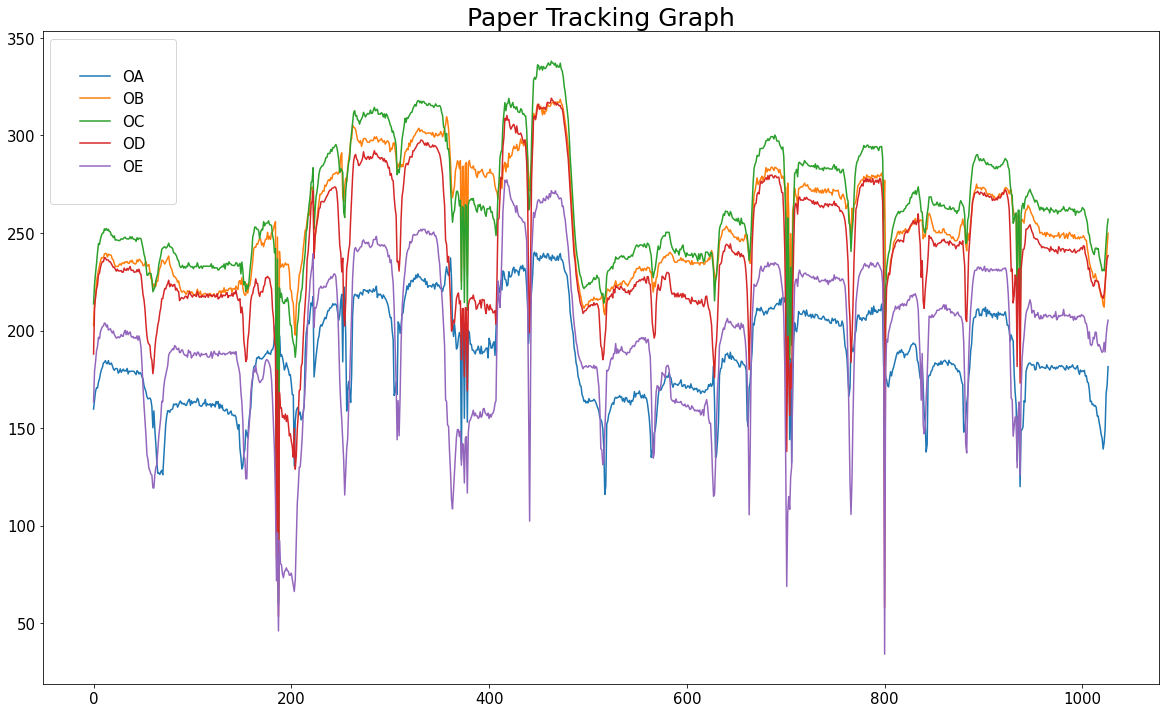

In [15]:
plt.plot(paper)
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Paper Tracking Graph", fontsize=25)
plt.legend(paper.columns, loc='upper left', prop={'size': 15}, borderpad=2)
plt.show()

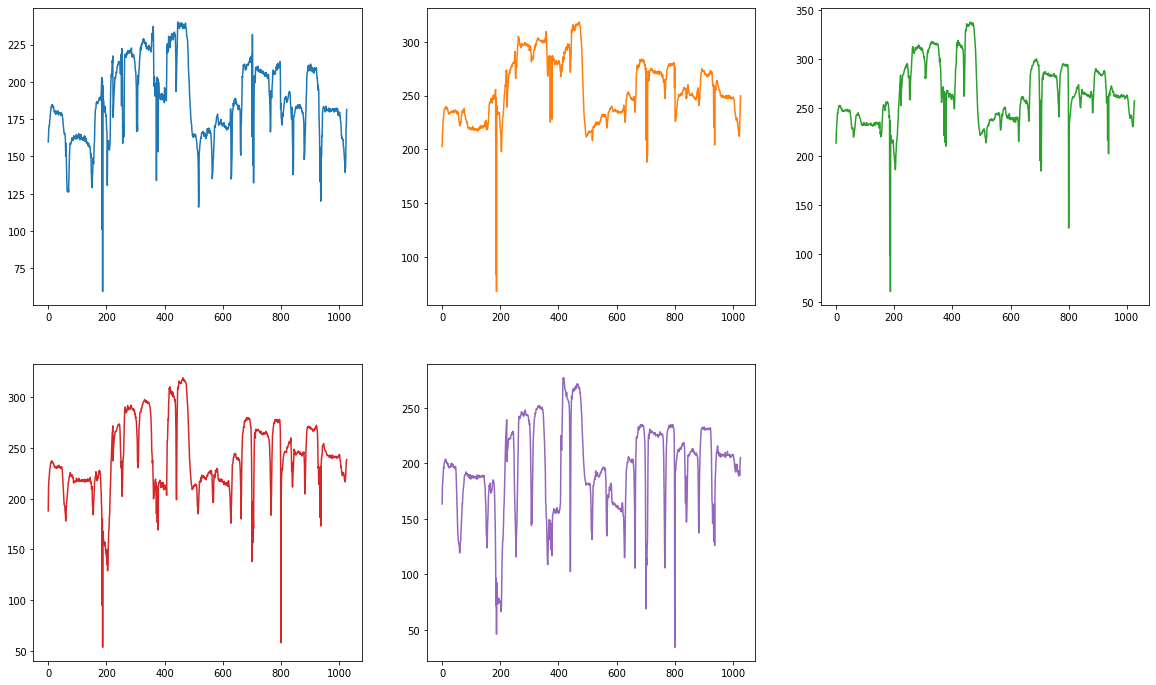

In [16]:
ax1 = plt.subplot(231)
ax1 = plt.plot(paper.OA, color='tab:blue')
ax2 = plt.subplot(232)
ax2 = plt.plot(paper.OB, color='tab:orange')
ax3 = plt.subplot(233)
ax3 = plt.plot(paper.OC, color='tab:green')
ax4 = plt.subplot(234)
ax4 = plt.plot(paper.OD, color='tab:red')
ax5 = plt.subplot(235)
ax5 = plt.plot(paper.OE, color='tab:purple')
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.show()

In [17]:
ax1_outliers_low, ax1_outliers_up = outliers(paper.OA)
ax1_avg = average(paper.OA)
ax1_lim_up = (ax1_outliers_up + ax1_avg) / 2
ax1_lim_low = (ax1_outliers_low + ax1_avg) / 2
ax2_outliers_low, ax2_outliers_up = outliers(paper.OB)
ax2_avg = average(paper.OB)
ax2_lim_up = (ax2_outliers_up + ax2_avg) / 2
ax2_lim_low = (ax2_outliers_low + ax2_avg) / 2
ax3_outliers_low, ax3_outliers_up = outliers(paper.OC)
ax3_avg = average(paper.OC)
ax3_lim_up = (ax3_outliers_up + ax3_avg) / 2
ax3_lim_low = (ax3_outliers_low + ax3_avg) / 2
ax4_outliers_low, ax4_outliers_up = outliers(paper.OD)
ax4_avg = average(paper.OD)
ax4_lim_up = (ax4_outliers_up + ax4_avg) / 2
ax4_lim_low = (ax4_outliers_low + ax4_avg) / 2
ax5_outliers_low, ax5_outliers_up = outliers(paper.OE)
ax5_avg = average(paper.OE)
ax5_lim_up = (ax5_outliers_up + ax5_avg) / 2
ax5_lim_low = (ax5_outliers_low + ax5_avg) / 2

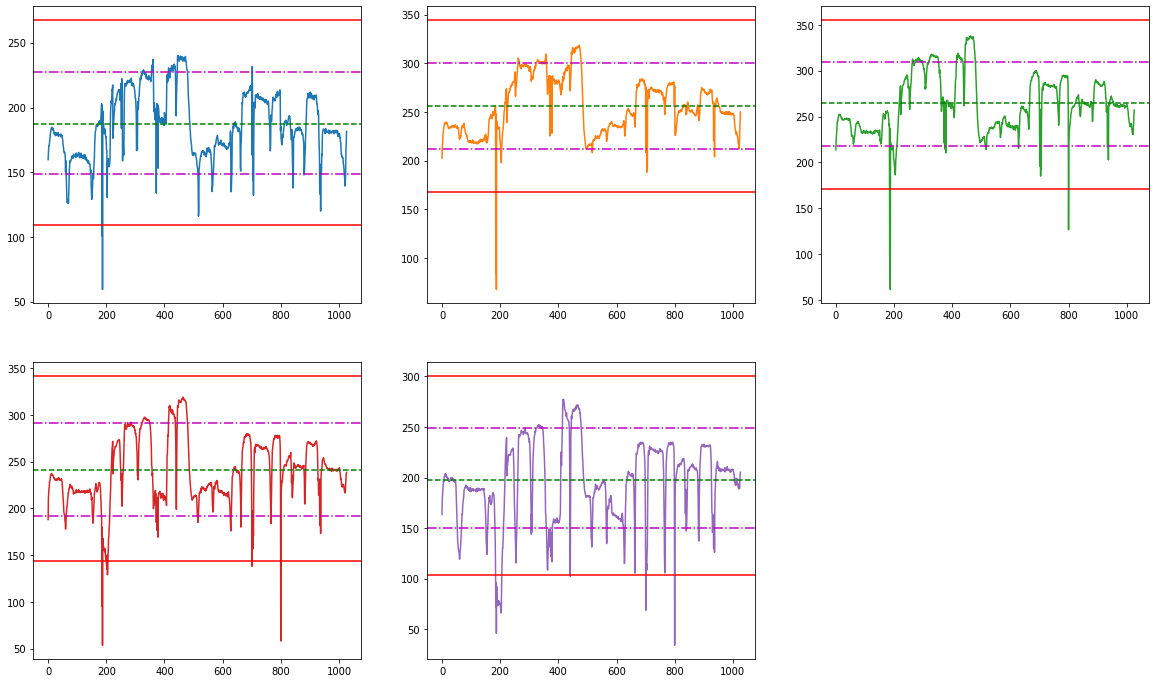

In [18]:
ax1 = plt.subplot(231)
ax1 = plt.plot(paper.OA, color='tab:blue')
ax1 = plt.axhline(y=ax1_outliers_low, color='r', linestyle='-')
ax1 = plt.axhline(y=ax1_outliers_up, color='r', linestyle='-')
ax1 = plt.axhline(y=ax1_avg, color='g', linestyle='--')
ax1 = plt.axhline(y=ax1_lim_up, color='m', linestyle='-.')
ax1 = plt.axhline(y=ax1_lim_low, color='m', linestyle='-.')
ax2 = plt.subplot(232)
ax2 = plt.plot(paper.OB, color='tab:orange')
ax2 = plt.axhline(y=ax2_outliers_low, color='r', linestyle='-')
ax2 = plt.axhline(y=ax2_outliers_up, color='r', linestyle='-')
ax2 = plt.axhline(y=ax2_avg, color='g', linestyle='--')
ax2 = plt.axhline(y=ax2_lim_up, color='m', linestyle='-.')
ax2 = plt.axhline(y=ax2_lim_low, color='m', linestyle='-.')
ax3 = plt.subplot(233)
ax3 = plt.plot(paper.OC, color='tab:green')
ax3 = plt.axhline(y=ax3_outliers_low, color='r', linestyle='-')
ax3 = plt.axhline(y=ax3_outliers_up, color='r', linestyle='-')
ax3 = plt.axhline(y=ax3_avg, color='g', linestyle='--')
ax3 = plt.axhline(y=ax3_lim_up, color='m', linestyle='-.')
ax3 = plt.axhline(y=ax3_lim_low, color='m', linestyle='-.')
ax4 = plt.subplot(234)
ax4 = plt.plot(paper.OD, color='tab:red')
ax4 = plt.axhline(y=ax4_outliers_low, color='r', linestyle='-')
ax4 = plt.axhline(y=ax4_outliers_up, color='r', linestyle='-')
ax4 = plt.axhline(y=ax4_avg, color='g', linestyle='--')
ax4 = plt.axhline(y=ax4_lim_up, color='m', linestyle='-.')
ax4 = plt.axhline(y=ax4_lim_low, color='m', linestyle='-.')
ax5 = plt.subplot(235)
ax5 = plt.plot(paper.OE, color='tab:purple')
ax5 = plt.axhline(y=ax5_outliers_low, color='r', linestyle='-')
ax5 = plt.axhline(y=ax5_outliers_up, color='r', linestyle='-')
ax5 = plt.axhline(y=ax5_avg, color='g', linestyle='--')
ax5 = plt.axhline(y=ax5_lim_up, color='m', linestyle='-.')
ax5 = plt.axhline(y=ax5_lim_low, color='m', linestyle='-.')
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.show()

In [19]:
paper_max = [max(paper.OA), max(paper.OB), max(paper.OC), max(paper.OD), max(paper.OE)]
paper_min = [min(paper.OA), min(paper.OB), min(paper.OC), min(paper.OD), min(paper.OE)]
paper_outlayer_up = [ax1_outliers_up, ax2_outliers_up, ax3_outliers_up, ax4_outliers_up, ax5_outliers_up]
paper_outlayer_low = [ax1_outliers_low, ax2_outliers_low, ax3_outliers_low, ax4_outliers_low, ax5_outliers_low]
paper_avg = [ax1_avg, ax2_avg, ax3_avg, ax4_avg, ax5_avg]
paper_limit_up = [ax1_lim_up, ax2_lim_up, ax3_lim_up, ax4_lim_up, ax5_lim_up]
paper_limit_low = [ax1_lim_low, ax2_lim_low, ax3_lim_low, ax4_lim_low, ax5_lim_low]

In [20]:
paper_tracking_summary = pd.DataFrame([paper_max, paper_min, paper_outlayer_low, paper_outlayer_up, paper_avg, paper_limit_up, paper_limit_low]).T
paper_tracking_summary = paper_tracking_summary.rename(columns={0:'Max', 1:'Min', 2:'Lower Outlayer', 3:'Upper Outlayer', 4:'Average', 5:'Limit up', 6:'Limit low'}, index={0:'OA', 1:'OB', 2:'OC', 3:'OD', 4:'OE'})
display(paper_tracking_summary)

,Max,Min,Lower Outlayer,Upper Outlayer,Average,Limit up,Limit low
OA,240.204080,59.413803,109.198187,267.627062,187.529217,227.578139,148.363702
OB,318.549839,67.623960,167.807628,344.417479,255.992523,300.205001,211.900076
OC,338.072477,61.220911,170.917001,355.410497,264.397352,309.903924,217.657176
OD,319.081494,53.535035,143.569603,341.836556,241.094155,291.465355,192.331879
OE,277.245379,34.205263,103.236410,300.549092,197.156020,248.852556,150.196215


# Scissors Tracking analysis

In [21]:
display(scissors)

,OA,OB,OC,OD,OE
0,121.342490,271.118055,286.558894,111.359777,98.310732
1,139.606590,286.015734,306.202547,120.830460,106.667708
2,146.891116,302.324329,316.128139,129.294238,120.241424
3,153.052279,307.197005,320.929899,131.946959,122.674366
4,169.047331,312.193850,334.741691,135.959553,128.316016
...,...,...,...,...,...
1022,161.483745,275.190843,258.507253,199.160739,170.390727
1023,158.521292,274.590604,261.451716,212.849712,167.263266
1024,160.031247,278.095307,267.860038,175.573346,150.306354
1025,158.382449,277.751688,274.823580,188.671672,161.474456


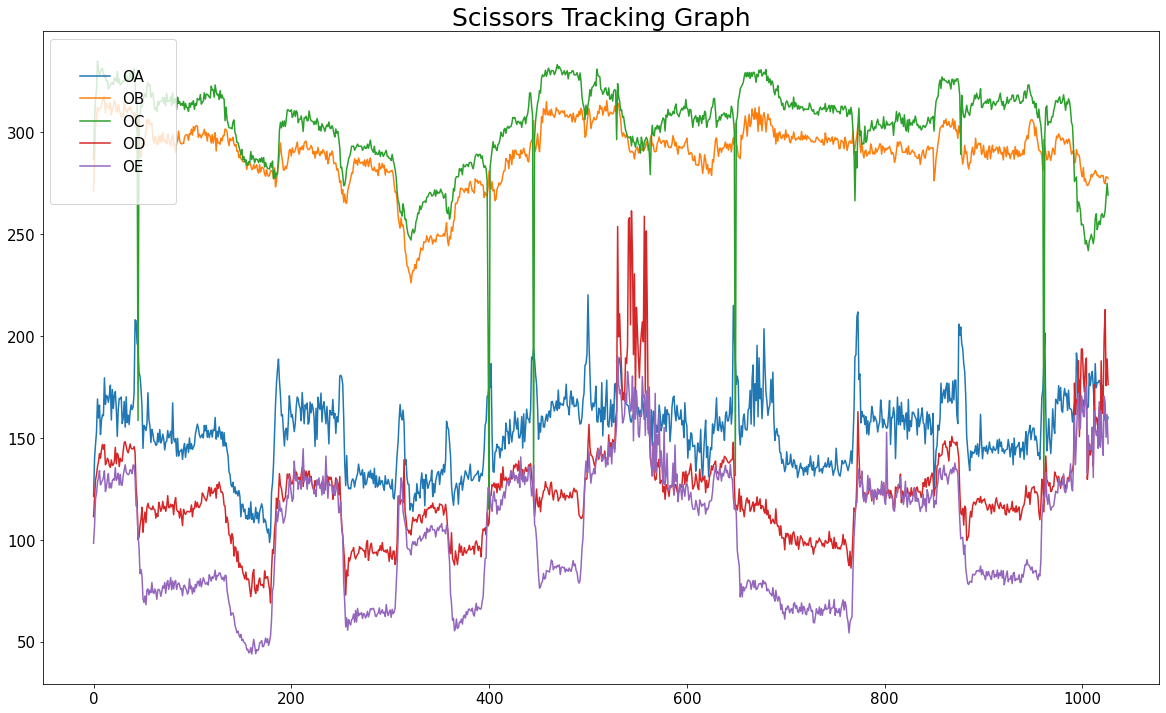

In [22]:
plt.plot(scissors)
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Scissors Tracking Graph", fontsize=25)
plt.legend(scissors.columns, loc='upper left', prop={'size': 15}, borderpad=2)
plt.show()

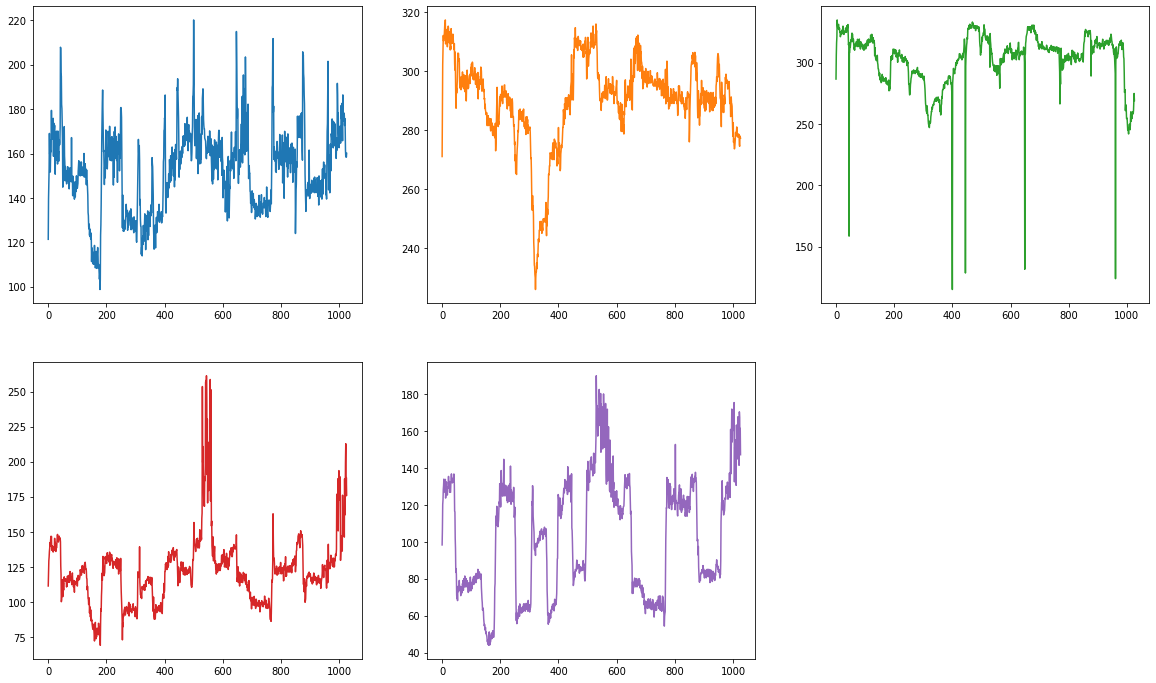

In [23]:
ax1 = plt.subplot(231)
ax1 = plt.plot(scissors.OA, color='tab:blue')
ax2 = plt.subplot(232)
ax2 = plt.plot(scissors.OB, color='tab:orange')
ax3 = plt.subplot(233)
ax3 = plt.plot(scissors.OC, color='tab:green')
ax4 = plt.subplot(234)
ax4 = plt.plot(scissors.OD, color='tab:red')
ax5 = plt.subplot(235)
ax5 = plt.plot(scissors.OE, color='tab:purple')
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.show()

In [24]:
ax1_outliers_low, ax1_outliers_up = outliers(scissors.OA)
ax1_avg = average(scissors.OA)
ax1_lim_up = (ax1_outliers_up + ax1_avg) / 2
ax1_lim_low = (ax1_outliers_low + ax1_avg) / 2
ax2_outliers_low, ax2_outliers_up = outliers(scissors.OB)
ax2_avg = average(scissors.OB)
ax2_lim_up = (ax2_outliers_up + ax2_avg) / 2
ax2_lim_low = (ax2_outliers_low + ax2_avg) / 2
ax3_outliers_low, ax3_outliers_up = outliers(scissors.OC)
ax3_avg = average(scissors.OC)
ax3_lim_up = (ax3_outliers_up + ax3_avg) / 2
ax3_lim_low = (ax3_outliers_low + ax3_avg) / 2
ax4_outliers_low, ax4_outliers_up = outliers(scissors.OD)
ax4_avg = average(scissors.OD)
ax4_lim_up = (ax4_outliers_up + ax4_avg) / 2
ax4_lim_low = (ax4_outliers_low + ax4_avg) / 2
ax5_outliers_low, ax5_outliers_up = outliers(scissors.OE)
ax5_avg = average(scissors.OE)
ax5_lim_up = (ax5_outliers_up + ax5_avg) / 2
ax5_lim_low = (ax5_outliers_low + ax5_avg) / 2

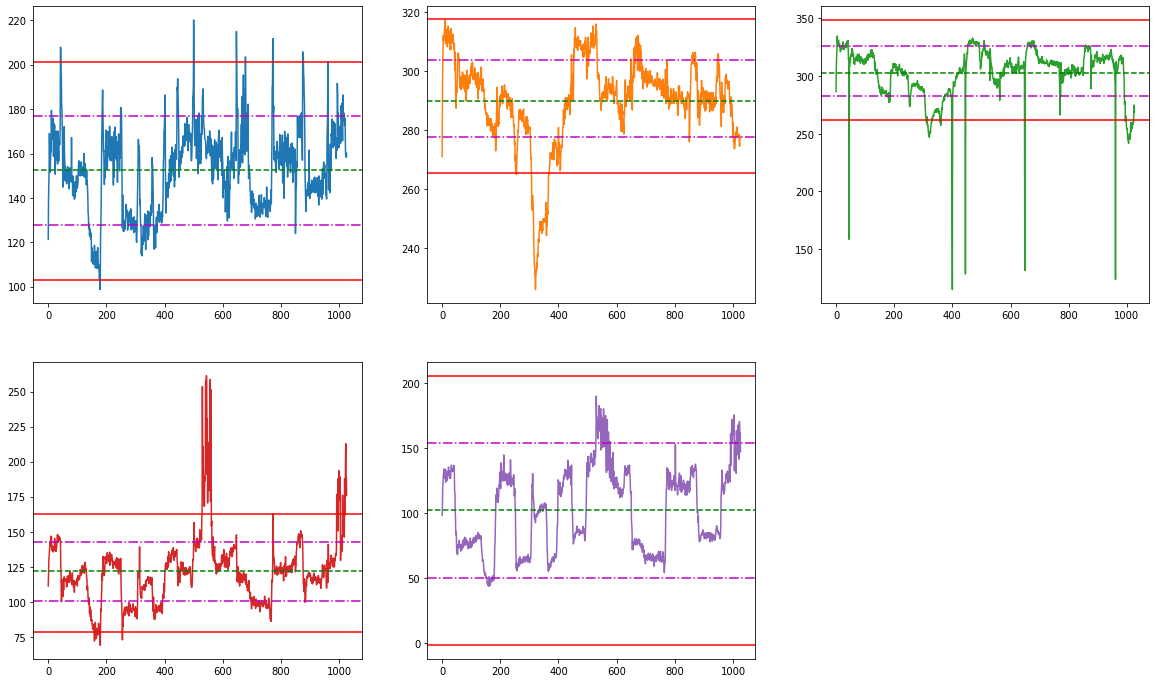

In [25]:
ax1 = plt.subplot(231)
ax1 = plt.plot(scissors.OA, color='tab:blue')
ax1 = plt.axhline(y=ax1_outliers_low, color='r', linestyle='-')
ax1 = plt.axhline(y=ax1_outliers_up, color='r', linestyle='-')
ax1 = plt.axhline(y=ax1_avg, color='g', linestyle='--')
ax1 = plt.axhline(y=ax1_lim_up, color='m', linestyle='-.')
ax1 = plt.axhline(y=ax1_lim_low, color='m', linestyle='-.')
ax2 = plt.subplot(232)
ax2 = plt.plot(scissors.OB, color='tab:orange')
ax2 = plt.axhline(y=ax2_outliers_low, color='r', linestyle='-')
ax2 = plt.axhline(y=ax2_outliers_up, color='r', linestyle='-')
ax2 = plt.axhline(y=ax2_avg, color='g', linestyle='--')
ax2 = plt.axhline(y=ax2_lim_up, color='m', linestyle='-.')
ax2 = plt.axhline(y=ax2_lim_low, color='m', linestyle='-.')
ax3 = plt.subplot(233)
ax3 = plt.plot(scissors.OC, color='tab:green')
ax3 = plt.axhline(y=ax3_outliers_low, color='r', linestyle='-')
ax3 = plt.axhline(y=ax3_outliers_up, color='r', linestyle='-')
ax3 = plt.axhline(y=ax3_avg, color='g', linestyle='--')
ax3 = plt.axhline(y=ax3_lim_up, color='m', linestyle='-.')
ax3 = plt.axhline(y=ax3_lim_low, color='m', linestyle='-.')
ax4 = plt.subplot(234)
ax4 = plt.plot(scissors.OD, color='tab:red')
ax4 = plt.axhline(y=ax4_outliers_low, color='r', linestyle='-')
ax4 = plt.axhline(y=ax4_outliers_up, color='r', linestyle='-')
ax4 = plt.axhline(y=ax4_avg, color='g', linestyle='--')
ax4 = plt.axhline(y=ax4_lim_up, color='m', linestyle='-.')
ax4 = plt.axhline(y=ax4_lim_low, color='m', linestyle='-.')
ax5 = plt.subplot(235)
ax5 = plt.plot(scissors.OE, color='tab:purple')
ax5 = plt.axhline(y=ax5_outliers_low, color='r', linestyle='-')
ax5 = plt.axhline(y=ax5_outliers_up, color='r', linestyle='-')
ax5 = plt.axhline(y=ax5_avg, color='g', linestyle='--')
ax5 = plt.axhline(y=ax5_lim_up, color='m', linestyle='-.')
ax5 = plt.axhline(y=ax5_lim_low, color='m', linestyle='-.')
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.show()

In [26]:
scissors_max = [max(scissors.OA), max(scissors.OB), max(scissors.OC), max(scissors.OD), max(scissors.OE)]
scissors_min = [min(scissors.OA), min(scissors.OB), min(scissors.OC), min(scissors.OD), min(scissors.OE)]
scissors_outlayer_up = [ax1_outliers_up, ax2_outliers_up, ax3_outliers_up, ax4_outliers_up, ax5_outliers_up]
scissors_outlayer_low = [ax1_outliers_low, ax2_outliers_low, ax3_outliers_low, ax4_outliers_low, ax5_outliers_low]
scissors_avg = [ax1_avg, ax2_avg, ax3_avg, ax4_avg, ax5_avg]
scissors_limit_up = [ax1_lim_up, ax2_lim_up, ax3_lim_up, ax4_lim_up, ax5_lim_up]
scissors_limit_low = [ax1_lim_low, ax2_lim_low, ax3_lim_low, ax4_lim_low, ax5_lim_low]

In [27]:
scissors_tracking_summary = pd.DataFrame([scissors_max, scissors_min, scissors_outlayer_low, scissors_outlayer_up, scissors_avg, scissors_limit_up, scissors_limit_low]).T
scissors_tracking_summary = scissors_tracking_summary.rename(columns={0:'Max', 1:'Min', 2:'Lower Outlayer', 3:'Upper Outlayer', 4:'Average', 5:'Limit up', 6:'Limit low'}, index={0:'OA', 1:'OB', 2:'OC', 3:'OD', 4:'OE'})
display(scissors_tracking_summary)

,Max,Min,Lower Outlayer,Upper Outlayer,Average,Limit up,Limit low
OA,220.165847,98.731960,102.903659,201.407952,152.562760,176.985356,127.733210
OB,317.455509,226.002212,265.419330,317.671876,290.104790,303.888333,277.762060
OC,334.741691,115.000000,261.574017,348.696095,303.112964,325.904529,282.343490
OD,261.306334,69.028979,78.595104,162.644368,122.325569,142.484968,100.460336
OE,189.931567,43.931765,-1.528316,205.529404,102.636579,154.082992,50.554132


In [43]:
scissors_cleaned = clean_data(dataset=scissors, lower_boundary=ax1_outliers_low, upper_boundary=ax1_outliers_up, column='OA')
scissors_cleaned = clean_data(dataset=scissors_cleaned, lower_boundary=ax2_outliers_low, upper_boundary=ax2_outliers_up, column='OB')
scissors_cleaned = clean_data(dataset=scissors_cleaned, lower_boundary=ax3_outliers_low, upper_boundary=ax3_outliers_up, column='OC')
scissors_cleaned = clean_data(dataset=scissors_cleaned, lower_boundary=ax4_outliers_low, upper_boundary=ax4_outliers_up, column='OD')
scissors_cleaned = clean_data(dataset=scissors_cleaned, lower_boundary=ax5_outliers_low, upper_boundary=ax5_outliers_up, column='OE')
scissors_cleaned = scissors_cleaned.reset_index()
del scissors_cleaned['index']
display(scissors_cleaned)

,OA,OB,OC,OD,OE
0,121.342490,271.118055,286.558894,111.359777,98.310732
1,139.606590,286.015734,306.202547,120.830460,106.667708
2,146.891116,302.324329,316.128139,129.294238,120.241424
3,153.052279,307.197005,320.929899,131.946959,122.674366
4,169.047331,312.193850,334.741691,135.959553,128.316016
...,...,...,...,...,...
865,163.783394,289.088222,304.553772,133.003759,126.491106
866,157.784663,290.082747,303.145180,134.350288,124.020160
867,162.631485,290.931263,292.063349,137.440896,137.058382
868,161.523992,285.574859,276.812211,161.418710,136.850283


In [45]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(scissors_cleaned)

             OA          OB          OC          OD          OE
0    121.342490  271.118055  286.558894  111.359777   98.310732
1    139.606590  286.015734  306.202547  120.830460  106.667708
2    146.891116  302.324329  316.128139  129.294238  120.241424
3    153.052279  307.197005  320.929899  131.946959  122.674366
4    169.047331  312.193850  334.741691  135.959553  128.316016
5    159.702849  310.315968  330.056056  138.311243  130.384048
6    166.027106  311.520465  327.832274  142.298981  133.958949
7    151.647618  311.520465  329.611893  140.003571  126.905477
8    158.521292  313.269852  330.823216  144.059016  128.222463
9    161.307160  315.634282  331.122334  146.768525  129.073622
10   160.853971  315.572496  327.832274  144.450684  130.598622
11   179.424079  317.455509  326.791983  146.696967  133.809566
12   166.388101  309.316990  328.074687  136.850283  123.693169
13   170.836179  314.159195  324.784544  137.884009  126.015872
14   170.141118  312.462798  325.170724 

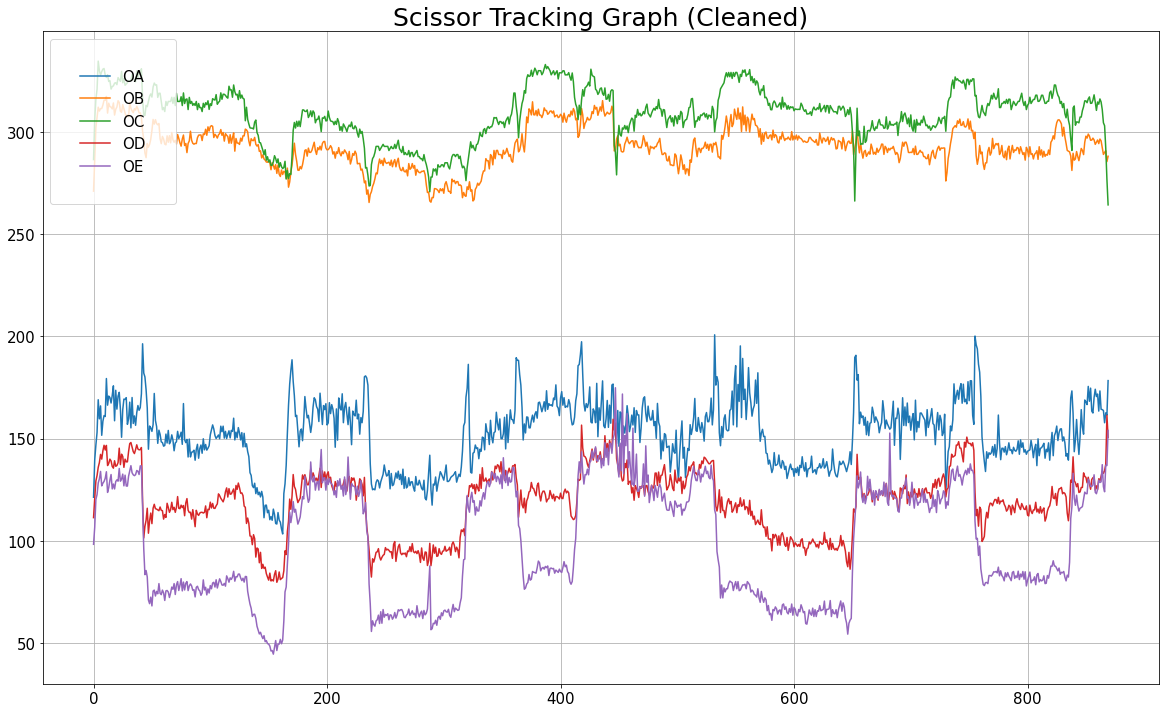

In [46]:
plt.plot(scissors_cleaned)
# plt.gca().get_lines().set_color(['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:purple'])
fig = plt.gcf()
fig.set_size_inches(20, 12, forward = False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Scissor Tracking Graph (Cleaned)", fontsize=25)
plt.legend(rock.columns, loc='upper left', prop={'size': 15}, borderpad=2)
plt.grid()
plt.show()